In [23]:
# Collect Vina output files


import os
import sys
import torch
import pandas as pd
output_dir="/nfs/data/targetdiff_data/sample_output"

def get_metric(metric,lines):
    if metric=="examples":
        return lines[0].split(" ")[-4].strip()
    if metric=="samples":
        return lines[1].split(" ")[-4].strip()
    for line in lines:
        line=line.split("]")[1].strip()
        if metric in line:
            if metric=="QED" or metric=="SA" or metric=="Vina Score" or metric=="Vina Min" or metric=="Vina Dock":
                line=line[line.find(":")+1:].strip()
                parts=line.split(" ")
                return parts[1].strip()+"/"+parts[3].strip()
            pos=line.find(":")
            return line[pos+1:].strip()
    return None

class TableTemplate:
    def __init__(self,exps):
        self.exps=exps
        self.prefix="""\\begin{table}[h!]
\\centering
\\caption{Comparison of Experimental Data}
\\resizebox{\\textwidth}{!}{\n"""
        col_sign="l"+"r"*(len(exps)+1)
        self.prefix+="\\begin{tabular}{"+col_sign+"} \n\\toprule \nMetric & "
        for exp in exps:
            exp=exp.replace("outputs_","").replace("targetdiff_","").replace("_"," ")
            self.prefix+=exp+" & "
        self.prefix+="\\\\ \n\\midrule \n"
        # print(self.prefix)
        self.suffix="\\bottomrule \n\\end{tabular} }\n\\label{tab:experiment_comparison} \n\\end{table}"
        # print(self.suffix)
    def insert_data(self,result_pd):
        content=""
        for metric in result_pd.index:
            content+=metric.replace("_"," ")+" & "
            for exp in self.exps:
                content+=str(result_pd.loc[metric,exp])+" & "
            content+="\\\\ \n"
        content=self.prefix+content+self.suffix
        content=content.replace("nan","-")
        return content

class TableWriter:
    def __init__(self,exps):
        self.exps=exps
    
    def generate_table(self):
        results=pd.DataFrame()
        table_template=TableTemplate(self.exps)
        for exp in self.exps:
            if exp=="paper":
                results.loc[exp,"QED"]="0.48/0.48"
                results.loc[exp,"SA"]="0.58/0.58"
                results.loc[exp,"Vina Score"]="-5.47/-6.30"
                results.loc[exp,"Vina Min"]="-6.64/-6.83"
                results.loc[exp,"Vina Dock"]="-7.80/-7.91"
                continue
            metric_path=os.path.join(output_dir,exp,"eval_results","log.txt")
            with open(metric_path,"r") as f:
                lines=f.readlines()

                metrics=["examples","samples","mol_stable","atm_stable","recon_success","eval_success","complete","JSD_6-6|4",
                    "JSD_6-6|4",
                    "JSD_6-6|1",
                    "JSD_6-8|1",
                    "JSD_6-7|1",
                    "JSD_6-8|2",
                    "JSD_6-6|2",
                    "JSD_6-7|4",
                    "JSD_6-7|2",
                    "JSD_CC_2A",
                    "JSD_All_12A",
                    "Atom type JS",
                    # "Number of reconstructed mols",
                    # "Number of complete mols",
                    # "Number of evaluated mols",
                    "QED",
                    "SA",
                    "Vina Score",
                    "Vina Min",
                    "Vina Dock"
                ]
                for metric in metrics:
                    value=get_metric(metric,lines)
                    # print("value for {} is {}".format(metric,value))
                    results.loc[exp,metric]=value
        results=results.T
        # print(results)
        content=table_template.insert_data(results)
        print(content)
        print("")

exps_all=[
        "paper",
        "outputs_pretrained",
        "targetdiff_ori",
        "outputs_targetdiff_bindnet_xattn",
        "outputs_targetdiff_unimol_xattn",
        "outputs_targetdiff_bindnet_xattn_alllayers",
        # "outputs_targetdiff_unimol_xattn_alllayers",
        "targetdiff_bindnet_xattn_cat_end",
        "targetdiff_unimol_xattn_cat_end",
        "targetdiff_bindnet_xattncat_alllayers",
        "targetdiff_unimol_xattncat_alllayers",
        "targetdiff_bindnet_xattnCatRespectively_end",
        "targetdiff_unimol_xattnCatRespectively_end",
        "targetdiff_bindnet_xattnRespectively",
        "targetdiff_unimol_xattnRespectively",
        "targetdiff_bindnet_xattnCatRespectively_alllayers",
        "targetdiff_unimol_xattnCatRespectively_alllayers",
        "targetdiff_bindnet_aThirdLayers",
        "targetdiff_unimol_aThirdLayers",

        "targetdiff_bindnet_crossdock_xattn_init",
        "targetdiff_unimol_crossdock_xattn_init",
        "targetdiff_bindnet_crossdock_xattnCat_init",
        "targetdiff_unimol_crossdock_xattnCat_init",
        "targetdiff_bindnet_crossdock_xattnCat_ending",
        "targetdiff_unimol_crossdock_xattnCat_ending",
        "targetdiff_bindnet_crossdock_xattnCat_aThirdLayers",
        "targetdiff_unimol_crossdock_xattnCat_aThirdLayers",

        "targetdiff_bindnet_crossdock_xattn_init_bs8_nab1"
]

exps_dataset=[
        "paper",
        "outputs_pretrained",
        "targetdiff_ori",
        "outputs_targetdiff_bindnet_xattn",
        "outputs_targetdiff_unimol_xattn",
        "targetdiff_bindnet_crossdock_xattn_init",
        "targetdiff_unimol_crossdock_xattn_init",
        "targetdiff_bindnet_xattnRespectively",
        "targetdiff_unimol_xattnRespectively",
]
exps_dataset_writer=TableWriter(exps_dataset)
exps_dataset_writer.generate_table()

exps_position=[
    "paper",
    "outputs_pretrained",
    "targetdiff_ori",
    "outputs_targetdiff_bindnet_xattn",
    "targetdiff_bindnet_xattn_cat_end",
    "targetdiff_bindnet_aThirdLayers",
    "targetdiff_bindnet_xattncat_alllayers",
]
exps_position_writer=TableWriter(exps_position)
exps_position_writer.generate_table()

exps_fusion_method=[
    "paper",
    "targetdiff_ori",
    "outputs_targetdiff_bindnet_xattn",
    "targetdiff_bindnet_xattnRespectively",
    
    "targetdiff_bindnet_xattncat_alllayers",
    "targetdiff_bindnet_xattnCatRespectively_alllayers",

    "targetdiff_bindnet_xattn_cat_end",
    "targetdiff_bindnet_xattnCatRespectively_end",
]
exps_fusion_method_writer=TableWriter(exps_fusion_method)
exps_fusion_method_writer.generate_table()


# exps_batchsize=[
#     "paper",
#     "outputs_pretrained",
#     "targetdiff_ori",
#     "targetdiff_bindnet_crossdock_xattn_init",
#     "targetdiff_bindnet_crossdock_xattn_init_bs8_nab1",
# ]
# exps_batchsize_writer=TableWriter(exps_batchsize)
# exps_batchsize_writer.generate_table()

\begin{table}[h!]
\centering
\caption{Comparison of Experimental Data}
\resizebox{\textwidth}{!}{
\begin{tabular}{lrrrrrrrrrr} 
\toprule 
Metric & paper & pretrained & ori & bindnet xattn & unimol xattn & bindnet crossdock xattn init & unimol crossdock xattn init & bindnet xattnRespectively & unimol xattnRespectively & \\ 
\midrule 
QED & 0.48/0.48 & 0.491/0.495 & 0.428/0.434 & 0.402/0.405 & 0.413/0.416 & 0.368/0.370 & 0.402/0.404 & 0.362/0.365 & 0.312/0.303 & \\ 
SA & 0.58/0.58 & 0.603/0.600 & 0.553/0.550 & 0.542/0.530 & 0.541/0.540 & 0.535/0.520 & 0.536/0.530 & 0.567/0.560 & 0.573/0.570 & \\ 
Vina Score & -5.47/-6.30 & -5.309/-6.158 & -5.649/-6.352 & -5.638/-6.262 & -5.855/-6.155 & -5.588/-6.064 & -5.655/-6.107 & -4.288/-4.977 & -4.347/-5.275 & \\ 
Vina Min & -6.64/-6.83 & -6.487/-6.718 & -6.460/-6.548 & -6.568/-6.625 & -6.648/-6.456 & -6.159/-6.154 & -6.310/-6.189 & -5.014/-5.130 & -5.202/-5.104 & \\ 
Vina Dock & -7.80/-7.91 & -7.608/-7.788 & -7.598/-7.700 & -7.691/-7.758 & -7.716/-

In [ ]:
# draw weight map of "cat"

import torch
import numpy as np
import matplotlib.pyplot as plt
# show weight
ckpt_path="/nfs/data/targetdiff_data/ckpts/cat_22200.pt"
ckpt=torch.load(ckpt_path)
linear_weight=ckpt["model"]["fusion_model.linear.weight"]
linear_bias=ckpt["model"]["fusion_model.linear.bias"]
weight_mean=torch.abs(linear_weight).mean(dim=0)
print(weight_mean.shape)
ori_h_weight=weight_mean[:128]
ret_weight=weight_mean[128:]
# print(ori_h_weight)
# print(ret_weight)
print(ori_h_weight.mean())
print(ret_weight.mean())

weight_mean_np = weight_mean.cpu().numpy()
weight_mean_np = np.mean(weight_mean_np.reshape(-1, 4), axis=1)


# pool the 128 dim weight_mean_np to 32 dim with mean pooling


scaled_weights = (weight_mean_np - np.min(weight_mean_np)) / (np.max(weight_mean_np) - np.min(weight_mean_np))

plt.figure(figsize=(len(scaled_weights), 1))
plt.imshow([scaled_weights], cmap='Greens', aspect='auto')
plt.colorbar()

plt.xticks(range(len(scaled_weights)), range(1, len(scaled_weights) + 1))
plt.yticks([])
plt.title('Weights: [0:128] is ori hidden state [128:] is ret_feat')

plt.show()

torch.Size([256])
tensor(0.0407, device='cuda:5')
tensor(0.0298, device='cuda:5')


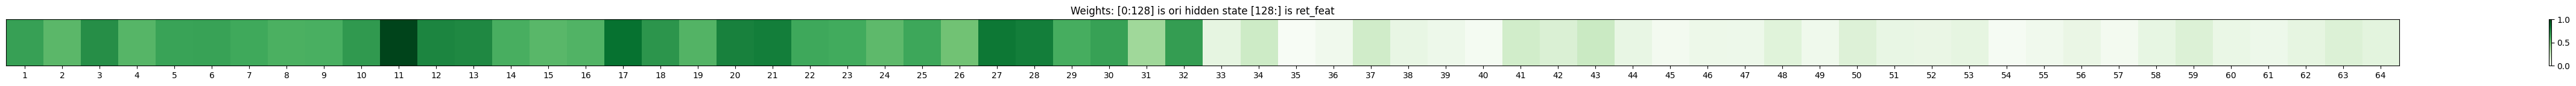

In [34]:
# draw weight map of "xattn_cat"

import torch
import numpy as np
import matplotlib.pyplot as plt
# show weight
ckpt_path="/nfs/data/targetdiff_data/ckpts/targetdiff_unimol_crossdock_xattnCat_ending_bs8_nab4.pt"
# ckpt_path="/nfs/data/targetdiff_data/ckpts/targetdiff_unimol_crossdock_xattnCat_ending_bs8_nab4.pt"

ckpt=torch.load(ckpt_path)
# linear_weight=ckpt["model"]["fusion_model.ending_cross_attention_module.linear_cat.weight"]
linear_weight=ckpt["model"]["fusion_model.ending_cross_attention_module.cross_attention.linear_cat.weight"]
weight_mean=torch.abs(linear_weight).mean(dim=0)
print(weight_mean.shape)
ori_h_weight=weight_mean[:128]
ret_weight=weight_mean[128:]
# print(ori_h_weight)
# print(ret_weight)
print(ori_h_weight.mean())
print(ret_weight.mean())

weight_mean_np = weight_mean.cpu().numpy()
weight_mean_np = np.mean(weight_mean_np.reshape(-1, 4), axis=1)


# pool the 128 dim weight_mean_np to 32 dim with mean pooling


scaled_weights = (weight_mean_np - np.min(weight_mean_np)) / (np.max(weight_mean_np) - np.min(weight_mean_np))

plt.figure(figsize=(len(scaled_weights), 1))
plt.imshow([scaled_weights], cmap='Greens', aspect='auto')
plt.colorbar()

plt.xticks(range(len(scaled_weights)), range(1, len(scaled_weights) + 1))
plt.yticks([])
plt.title('Weights: [0:128] is ori hidden state [128:] is ret_feat')

plt.show()

In [31]:
import json
for k in ckpt["model"].keys():
    print(k)


betas
alphas_cumprod
alphas_cumprod_prev
sqrt_alphas_cumprod
sqrt_one_minus_alphas_cumprod
sqrt_recip_alphas_cumprod
sqrt_recipm1_alphas_cumprod
posterior_mean_c0_coef
posterior_mean_ct_coef
posterior_var
posterior_logvar
log_alphas_v
log_one_minus_alphas_v
log_alphas_cumprod_v
log_one_minus_alphas_cumprod_v
Lt_history
Lt_count
fusion_model.ending_cross_attention_module.cross_attention.linear_query.weight
fusion_model.ending_cross_attention_module.cross_attention.linear_query.bias
fusion_model.ending_cross_attention_module.cross_attention.attention.in_proj_weight
fusion_model.ending_cross_attention_module.cross_attention.attention.in_proj_bias
fusion_model.ending_cross_attention_module.cross_attention.attention.out_proj.weight
fusion_model.ending_cross_attention_module.cross_attention.attention.out_proj.bias
fusion_model.ending_cross_attention_module.cross_attention.linear_cat.weight
fusion_model.ending_cross_attention_module.cross_attention.linear_cat.bias
protein_atom_emb.weight
prot

In [1]:
# generate conformation using rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
smiles = 'CCO'  # 以乙醇为例
molecule = Chem.MolFromSmiles(smiles)
molecule = Chem.AddHs(molecule)

AllChem.EmbedMolecule(molecule)
print(Chem.MolToMolBlock(molecule))


     RDKit          3D

  9  8  0  0  0  0  0  0  0  0999 V2000
   -0.9535    0.0478    0.0425 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.4891   -0.3204   -0.1886 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2770    0.3248    0.7377 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3570    0.7340   -0.7332 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5933   -0.8626    0.0218 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0710    0.5964    1.0112 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.7879   -0.1377   -1.2385 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.5896   -1.4290   -0.0413 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.8313    1.0466    0.3885 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  1  4  1  0
  1  5  1  0
  1  6  1  0
  2  7  1  0
  2  8  1  0
  3  9  1  0
M  END

